# Feature Engineering

This notebook is going to look at the New York 2019 airbnb dataset to perform data cleaning and modification through analysis to ensure that the data is ml model ready. The objective is to find features that can be used to predict airbnb pricing for a given geographic location.

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's read in the dataset for airbnb

In [2]:
df = pd.read_csv("listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20220312074014,2022-03-13,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,https://www.airbnb.com/users/show/8028,...,4.81,4.73,4.78,NaN,f,1,1,0,0,3.69
1,5769,https://www.airbnb.com/rooms/5769,20220312074014,2022-03-31,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,https://www.airbnb.com/users/show/8186,...,4.94,4.74,4.92,NaN,f,1,0,1,0,1.81
2,6413,https://www.airbnb.com/rooms/6413,20220312074014,2022-03-31,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,https://www.airbnb.com/users/show/13879,...,4.98,4.86,4.94,NaN,t,1,1,0,0,0.78
3,6448,https://www.airbnb.com/rooms/6448,20220312074014,2022-03-12,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/4513152/4ffc1...,14156,https://www.airbnb.com/users/show/14156,...,4.97,4.97,4.89,NaN,t,1,1,0,0,2.09
4,8502,https://www.airbnb.com/rooms/8502,20220312074014,2022-03-13,Woodland Studio Lodging,<b>The space</b><br />Fully furnished suite wi...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,25298,https://www.airbnb.com/users/show/25298,...,4.86,4.64,4.57,NaN,f,1,1,0,0,0.33


In [3]:
df.shape

(11972, 74)

In [4]:
#Get the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11972 entries, 0 to 11971
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            11972 non-null  int64  
 1   listing_url                                   11972 non-null  object 
 2   scrape_id                                     11972 non-null  int64  
 3   last_scraped                                  11972 non-null  object 
 4   name                                          11972 non-null  object 
 5   description                                   11808 non-null  object 
 6   neighborhood_overview                         7059 non-null   object 
 7   picture_url                                   11971 non-null  object 
 8   host_id                                       11972 non-null  int64  
 9   host_url                                      11972 non-null 

Let's do a subset of the columns (exclude the ones that are irrelevant to our query)

In [5]:
df_subset = df.loc[:, ~df.columns.isin(['id', 'listing_url', 'scrape_id', 'last_scraped', 'host_id', 'host_url', 'picture_url', 'host_picture_url', 'host_thumbnail_url', 'calendar_last_scraped', 'first_review', 'license', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_verifications', 'availability_60', 'availability_90', 'availability_365', 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated'])]
df_subset.head()

,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,Sylvia,2009-02-16,"Austin, Texas, United States",I am a licensed Real Estate Broker and owner o...,within an hour,100%,94%,...,4.83,4.87,4.85,4.89,4.81,4.73,4.78,f,1,3.69
1,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,Elizabeth,2009-02-19,"Austin, Texas, United States",We're easygoing professionals that enjoy meeti...,NaN,NaN,100%,...,4.90,4.90,4.86,4.91,4.94,4.74,4.92,f,1,1.81
2,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,Todd,2009-04-17,"Austin, Texas, United States","We're a young family that likes to travel, we ...",within an hour,100%,100%,...,4.97,4.99,4.99,4.99,4.98,4.86,4.94,t,1,0.78
3,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,Amy,2009-04-20,"Austin, Texas, United States","We are a family of four (with teenagers, all o...",within an hour,100%,98%,...,4.97,4.97,4.96,4.99,4.97,4.97,4.89,t,1,2.09
4,Woodland Studio Lodging,<b>The space</b><br />Fully furnished suite wi...,NaN,Karen,2009-07-11,"Austin, Texas, United States",I handle the reservations at the studio on the...,within a day,83%,29%,...,4.53,4.49,4.67,4.83,4.86,4.64,4.57,f,1,0.33


In [6]:
#Viewing the number of null values per column
df_subset.isnull().sum()

name                                 0
description                        164
neighborhood_overview             4913
host_name                            3
host_since                           3
host_location                       18
host_about                        4679
host_response_time                3449
host_response_rate                3449
host_acceptance_rate              2862
host_is_superhost                    3
host_neighbourhood                1718
host_listings_count                  3
host_total_listings_count            3
host_has_profile_pic                 3
host_identity_verified               3
neighbourhood                     4913
neighbourhood_cleansed               0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms_text                      16
bedrooms                           711
beds                     

In [7]:
df_subset = df_subset.dropna(subset=['host_name', 'maximum_minimum_nights'])

In [8]:
df_subset.isna().sum()

name                                 0
description                        163
neighborhood_overview             4909
host_name                            0
host_since                           0
host_location                       15
host_about                        4676
host_response_time                3445
host_response_rate                3445
host_acceptance_rate              2859
host_is_superhost                    0
host_neighbourhood                1715
host_listings_count                  0
host_total_listings_count            0
host_has_profile_pic                 0
host_identity_verified               0
neighbourhood                     4909
neighbourhood_cleansed               0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms_text                      15
bedrooms                           710
beds                     

Looking at some of the data for our "boolean" values they appear to be characters of either 't' or 'f' for true and false respectively. Let's change those to be 0 or 1 for the ml models.

In [9]:
#Convert t/f values in the columns to 0/1
boolean_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'has_availability']
# df_subset[boolean_cols] = df_subset[boolean_cols].apply(lambda x: 0 if x == 'f' else 1)
for col in boolean_cols:
    df_subset[col] = df_subset[col].apply(lambda x: 0 if x == 'f' else 1)
df_subset.head()

,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,Sylvia,2009-02-16,"Austin, Texas, United States",I am a licensed Real Estate Broker and owner o...,within an hour,100%,94%,...,4.83,4.87,4.85,4.89,4.81,4.73,4.78,0,1,3.69
1,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,Elizabeth,2009-02-19,"Austin, Texas, United States",We're easygoing professionals that enjoy meeti...,NaN,NaN,100%,...,4.90,4.90,4.86,4.91,4.94,4.74,4.92,0,1,1.81
2,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,Todd,2009-04-17,"Austin, Texas, United States","We're a young family that likes to travel, we ...",within an hour,100%,100%,...,4.97,4.99,4.99,4.99,4.98,4.86,4.94,1,1,0.78
3,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,Amy,2009-04-20,"Austin, Texas, United States","We are a family of four (with teenagers, all o...",within an hour,100%,98%,...,4.97,4.97,4.96,4.99,4.97,4.97,4.89,1,1,2.09
4,Woodland Studio Lodging,<b>The space</b><br />Fully furnished suite wi...,NaN,Karen,2009-07-11,"Austin, Texas, United States",I handle the reservations at the studio on the...,within a day,83%,29%,...,4.53,4.49,4.67,4.83,4.86,4.64,4.57,0,1,0.33


In [10]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11968 entries, 0 to 11971
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            11968 non-null  object 
 1   description                     11805 non-null  object 
 2   neighborhood_overview           7059 non-null   object 
 3   host_name                       11968 non-null  object 
 4   host_since                      11968 non-null  object 
 5   host_location                   11953 non-null  object 
 6   host_about                      7292 non-null   object 
 7   host_response_time              8523 non-null   object 
 8   host_response_rate              8523 non-null   object 
 9   host_acceptance_rate            9109 non-null   object 
 10  host_is_superhost               11968 non-null  int64  
 11  host_neighbourhood              10253 non-null  object 
 12  host_listings_count             

The next step is to take additional columns and convert them into boolean columns (if needed). For example the description column could be converted into a boolean column (i.e. has_description).

In [11]:
!pip install wordcloud

In [11]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

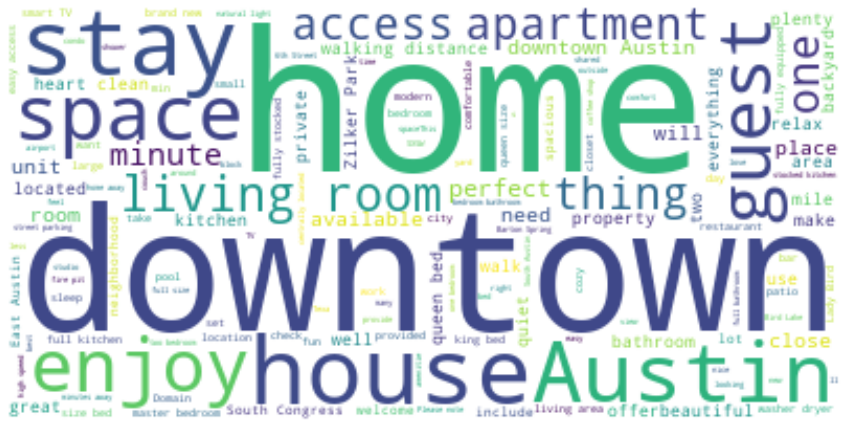

In [57]:
#Let's look at a word cloud for the description see what words are occurring the most
exclude_list = ['<b>', '</b>', '<br />']#exclude special characters
text = " ".join(word for word in df_subset['description'] if not pd.isna(word))
for exclude_char in exclude_list:
    text = text.replace(exclude_char, '')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

What does the word cloud look like when comparing airbnb's that have 50% or more occupancy during the last 30 days versus ones that have less than 50% occupancy.

In [12]:
df_subset['percentage_aval_30'] = df_subset['availability_30'] / 30
df_50_percent_avail = df_subset.loc[df_subset['percentage_aval_30'] >= .5]
df_under_percent_avail = df_subset.loc[df_subset['percentage_aval_30'] <= .5]

In [93]:
df_subset['percentage_aval_30']

0        0.233333
1        0.000000
2        0.000000
3        0.300000
4        0.000000
           ...   
11967    1.000000
11968    0.933333
11969    0.933333
11970    0.933333
11971    0.933333
Name: percentage_aval_30, Length: 11968, dtype: float64

In [19]:
df_under_percent_avail.shape

(9204, 53)

In [20]:
df_50_percent_avail.shape

(3002, 53)

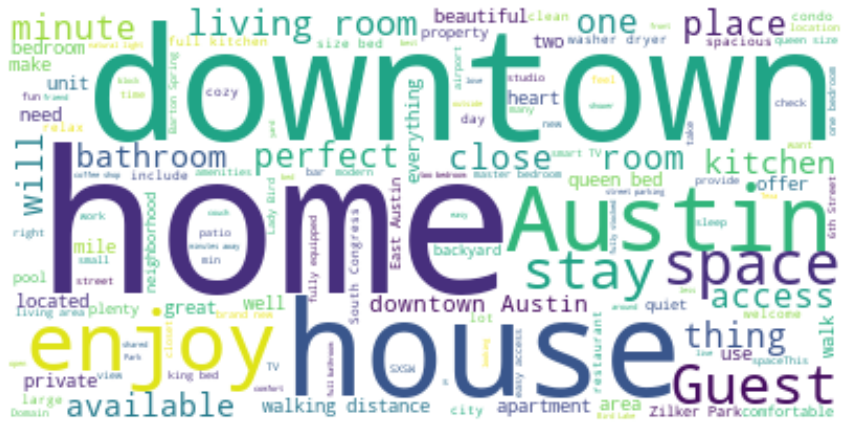

In [21]:
exclude_list = ['<b>', '</b>', '<br />']#exclude special characters
text = " ".join(word for word in df_under_percent_avail['description'] if not pd.isna(word))
for exclude_char in exclude_list:
    text = text.replace(exclude_char, '')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

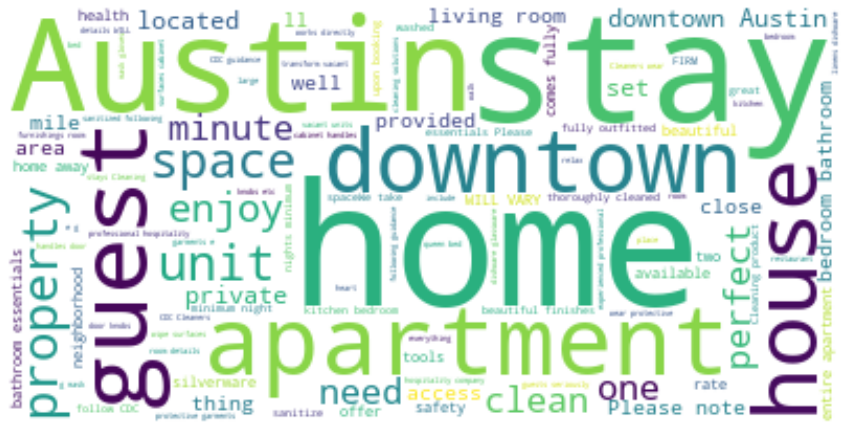

In [22]:
exclude_list = ['<b>', '</b>', '<br />']#exclude special characters
text = " ".join(word for word in df_50_percent_avail['description'] if not pd.isna(word))
for exclude_char in exclude_list:
    text = text.replace(exclude_char, '')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Interesting some of the words that stand out from breaking the dataset down into two. I'm curious to see if there are other insights that distinguish the two. Such as on average do airbnb's that have a higher booking rate tend to get better reviews than their counterparts. Let's do a t-test to find out.

<AxesSubplot:>

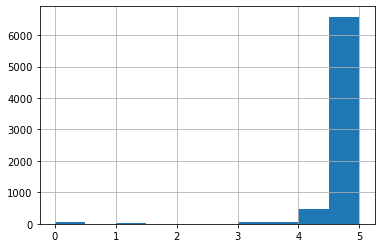

In [23]:
#Look at the distribution of the data for the two groups
df_under_percent_avail['review_scores_rating'].hist()

<AxesSubplot:>

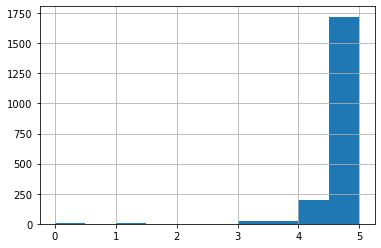

In [24]:
df_50_percent_avail['review_scores_rating'].hist()

In [25]:
df_under_percent_avail['review_scores_rating'].describe()

count    7260.000000
mean        4.766833
std         0.593792
min         0.000000
25%         4.760000
50%         4.930000
75%         5.000000
max         5.000000
Name: review_scores_rating, dtype: float64

In [26]:
df_50_percent_avail['review_scores_rating'].describe()

count    1977.000000
mean        4.736677
std         0.468766
min         0.000000
25%         4.670000
50%         4.870000
75%         5.000000
max         5.000000
Name: review_scores_rating, dtype: float64

In [13]:
import json

In [14]:
amenties_text = list(df_50_percent_avail['amenities'])
amenties_text = list(map(lambda x: json.loads(x), amenties_text))

In [15]:
amenties_text_full = " ".join([ ". ".join(amenities_str) for amenities_str in amenties_text ])

In [18]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mgfos207/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mgfos207/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
#Remove stop words from amenities
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [19]:
stop_words = set(stopwords.words('english'))
tokenized_sent = nltk.sent_tokenize(amenties_text_full)
# filtered_sentence = [w for w in tokenized_sent if not w.lower() in stop_words]
filtered_sentence = [sent.replace(".", "") for sent in tokenized_sent]

In [20]:
from collections import Counter
avail_50_or_more = Counter(filtered_sentence)

In [21]:
avail_50_set = set([common_word[0] for common_word in avail_50_or_more.most_common(10)])

In [22]:
top_amenities_set = set()
top_amenities_set = top_amenities_set.union(avail_50_set)

In [23]:
amenties_text = list(df_under_percent_avail['amenities'])
amenties_text = list(map(lambda x: json.loads(x), amenties_text))

In [24]:
# amenties_text_full = " ".join([ " ".join(amenities_str) for amenities_str in amenties_text ])
amenties_text_full = " ".join([ ". ".join(amenities_str) for amenities_str in amenties_text ])

In [25]:
# stop_words = set(stopwords.words('english'))
# tokenized_sent = word_tokenize(amenties_text_full)
tokenized_sent = nltk.sent_tokenize(amenties_text_full)
# filtered_sentence = [w for w in tokenized_sent if not w.lower() in stop_words]
filtered_sentence = [sent.replace(".", "") for sent in tokenized_sent]

In [26]:
avail_less_50 = Counter(filtered_sentence)

In [27]:
avail_less_50_set = set([common_word[0] for common_word in avail_less_50.most_common(10)])

In [28]:
top_amenities_set = top_amenities_set.union(avail_less_50_set)

In [29]:
top_amenities_set

{'Air conditioning',
 'Essentials',
 'Free parking on premises',
 'Hair dryer',
 'Hangers',
 'Heating',
 'Iron',
 'Kitchen',
 'Long term stays allowed',
 'Shampoo',
 'Smoke alarm',
 'Washer',
 'Wifi'}

Very interesting the top 12 unique amenties that successful bookings have, let' see if we can create a one hot encoding of these amenties by looking up the amenities list contains these attributes. One thing to note is that not all the data will have the exact same spelling or case but we can use 'Fuzzy' matching to do comparisons with just in case.

In [3]:
#Install required lib(s) for fuzz matching
!pip install fuzzywuzzy
!pip install python-Levenshtein

     |████████████████████████████████| 50 kB 1.6 MB/s eta 0:00:011
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp39-cp39-linux_x86_64.whl size=79925 sha256=9193d7ae401847cd436f5f8a3fe61f4d89f6d86d4a07aa3b4f4dcf694cea0f59
  Stored in directory: /home/mgfos207/.cache/pip/wheels/46/4a/6c/164a1d9dd67c82d208f19d869ad0a517a0c5a6117f608c53e6
Successfully built python-Levenshtein


In [30]:
#import fuzzy matching library
from fuzzywuzzy import fuzz

In [31]:
#Iterate over each of the top amenties and create one hot encoded columns
def _find_fuzzy_match(amenities_list, amenity):
    parsed_amenities_list = json.loads(amenities_list)
    for amenity_text in parsed_amenities_list:
        if fuzz.ratio(amenity.lower(), amenity_text.lower()) >= 85:
            return 1
    return 0

for amenity in top_amenities_set:
    df_subset[f'has_{amenity.lower()}'] = df_subset['amenities'].apply(lambda x: _find_fuzzy_match(x, amenity))

In [32]:
df_subset.head()

,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,has_air conditioning,has_smoke alarm,has_kitchen,has_wifi,has_iron,has_shampoo,has_long term stays allowed,has_free parking on premises,has_hair dryer,has_heating
0,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,Sylvia,2009-02-16,"Austin, Texas, United States",I am a licensed Real Estate Broker and owner o...,within an hour,100%,94%,...,1,1,1,1,1,1,1,0,1,1
1,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,Elizabeth,2009-02-19,"Austin, Texas, United States",We're easygoing professionals that enjoy meeti...,NaN,NaN,100%,...,1,1,1,1,0,1,0,1,1,1
2,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,Todd,2009-04-17,"Austin, Texas, United States","We're a young family that likes to travel, we ...",within an hour,100%,100%,...,1,1,1,1,1,1,1,1,1,1
3,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,Amy,2009-04-20,"Austin, Texas, United States","We are a family of four (with teenagers, all o...",within an hour,100%,98%,...,0,1,1,1,1,1,1,1,1,0
4,Woodland Studio Lodging,<b>The space</b><br />Fully furnished suite wi...,NaN,Karen,2009-07-11,"Austin, Texas, United States",I handle the reservations at the studio on the...,within a day,83%,29%,...,1,1,1,1,0,1,1,0,1,1


Let's go ahead and drop the amenities column since we have extracted the useful info from it

In [33]:
df_subset.drop(columns=['amenities'], inplace=True)

Looking at the data summary stats both groups don't appear to have any significant difference between them let's verify with a t-test. (Null hypothesis there is no difference between the two data sets).

In [65]:
#import stats lib for tests
import scipy.stats as stats

In [66]:
under_50_booking_rev = df_50_percent_avail['review_scores_rating'].dropna()
over_50_booking_rev = df_under_percent_avail['review_scores_rating'].dropna()
stats.ttest_ind(under_50_booking_rev, over_50_booking_rev, equal_var=False)

Ttest_indResult(statistic=-2.386211158373828, pvalue=0.01707065854559993)

With a relatively small pvalue its safe to say that we cannot reject the null hypothesis

Let's do a pairwise pearson correlation of the data to see what features have a strong correlation to our target variable (price)

<AxesSubplot:>

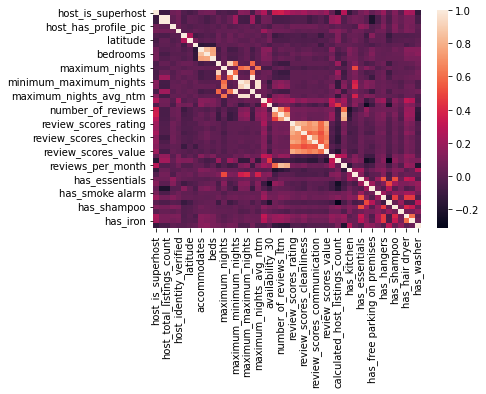

In [67]:
#heatmap visual for feature corelation
sns.heatmap(df_subset.corr())

In [68]:
df_subset['neighbourhood'].unique()

array(['Austin, Texas, United States', nan, 'United States',
       'West Lake Hills, Texas, United States',
       'Volente, Texas, United States', 'Manchaca, Texas, United States',
       'Dripping Springs, Texas, United States',
       'Lakeway, Texas, United States',
       'Sunset Valley, Texas, United States',
       'Lago Vista, Texas, United States',
       'Bouldin, Austin, Texas, United States',
       'Manor, Austin, Texas, United States',
       'Round Rock, Texas, United States',
       'Austin , Texas, United States',
       'Rollingwood, Texas, United States',
       'Westlake Hills, Austin, Texas, United States',
       'Austin, United States', 'Buda, Texas, United States',
       'Del Valle, Texas, United States',
       'The Hills, Texas, United States',
       'Clarksville, Texas, United States',
       'Pflugerville, Texas, United States',
       'Manor, Texas, United States', 'Austin, Tx, United States',
       'Lake Travis, Texas, United States',
       'Cedar Par

Let's adjust the the 'Nan' values for the neighborhood column, by giving a placeholder string such as 'NA'

In [34]:
# df_subset.loc[df_subset['neighbourhood'] == 'N/A', 'neighbourhood'] = 'United States'
df_subset['neighbourhood'] = df_subset['neighbourhood'].fillna('United States')

In [70]:
df_subset['neighbourhood'].unique()

array(['Austin, Texas, United States', 'United States',
       'West Lake Hills, Texas, United States',
       'Volente, Texas, United States', 'Manchaca, Texas, United States',
       'Dripping Springs, Texas, United States',
       'Lakeway, Texas, United States',
       'Sunset Valley, Texas, United States',
       'Lago Vista, Texas, United States',
       'Bouldin, Austin, Texas, United States',
       'Manor, Austin, Texas, United States',
       'Round Rock, Texas, United States',
       'Austin , Texas, United States',
       'Rollingwood, Texas, United States',
       'Westlake Hills, Austin, Texas, United States',
       'Austin, United States', 'Buda, Texas, United States',
       'Del Valle, Texas, United States',
       'The Hills, Texas, United States',
       'Clarksville, Texas, United States',
       'Pflugerville, Texas, United States',
       'Manor, Texas, United States', 'Austin, Tx, United States',
       'Lake Travis, Texas, United States',
       'Cedar Park, Te

In [71]:
df_subset['neighbourhood'].nunique()

28

# Categorical Data Transformation

Now let's convert this column into categorical variables that our ml model can understand

In [35]:
df_dummy = pd.get_dummies(df_subset, columns=['neighbourhood'])
df_dummy.head()

,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,"neighbourhood_Pflugerville, Texas, United States","neighbourhood_Rollingwood, Texas, United States","neighbourhood_Round Rock, Texas, United States","neighbourhood_Sunset Valley, Texas, United States","neighbourhood_The Hills, Texas, United States","neighbourhood_Travis County, Texas, United States",neighbourhood_United States,"neighbourhood_Volente, Texas, United States","neighbourhood_West Lake Hills, Texas, United States","neighbourhood_Westlake Hills, Austin, Texas, United States"
0,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,Sylvia,2009-02-16,"Austin, Texas, United States",I am a licensed Real Estate Broker and owner o...,within an hour,100%,94%,...,0,0,0,0,0,0,0,0,0,0
1,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,Elizabeth,2009-02-19,"Austin, Texas, United States",We're easygoing professionals that enjoy meeti...,NaN,NaN,100%,...,0,0,0,0,0,0,0,0,0,0
2,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,Todd,2009-04-17,"Austin, Texas, United States","We're a young family that likes to travel, we ...",within an hour,100%,100%,...,0,0,0,0,0,0,0,0,0,0
3,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,Amy,2009-04-20,"Austin, Texas, United States","We are a family of four (with teenagers, all o...",within an hour,100%,98%,...,0,0,0,0,0,0,0,0,0,0
4,Woodland Studio Lodging,<b>The space</b><br />Fully furnished suite wi...,NaN,Karen,2009-07-11,"Austin, Texas, United States",I handle the reservations at the studio on the...,within a day,83%,29%,...,0,0,0,0,0,0,1,0,0,0


In [95]:
df_dummy['percentage_aval_30']

0        0.233333
1        0.000000
2        0.000000
3        0.300000
4        0.000000
           ...   
11967    1.000000
11968    0.933333
11969    0.933333
11970    0.933333
11971    0.933333
Name: percentage_aval_30, Length: 11968, dtype: float64

Let's do the same thing with property type

In [73]:
df_dummy['property_type'].unique()

array(['Entire guesthouse', 'Private room in home', 'Entire guest suite',
       'Entire residential home', 'Entire townhouse',
       'Private room in residential home', 'Entire condominium (condo)',
       'Entire rental unit', 'Entire home', 'Entire bungalow',
       'Entire condo', 'Private room in loft', 'Private room',
       'Entire loft', 'Private room in guest suite',
       'Private room in cabin', 'Room in bed and breakfast',
       'Private room in bungalow', 'Entire cottage',
       'Private room in rental unit',
       'Private room in condominium (condo)', 'Entire villa', 'Campsite',
       'Entire cabin', 'Private room in condo',
       'Private room in townhouse', 'Camper/RV',
       'Private room in bed and breakfast', 'Private room in guesthouse',
       'Tiny house', 'Boat', 'Shared room in home',
       'Private room in tiny house', 'Tent', 'Shared room',
       'Entire place', 'Shared room in rental unit', 'Bus',
       'Entire serviced apartment', 'Shared room in

In [74]:
df_dummy['property_type'].nunique()

79

In [36]:
df_dummy = pd.get_dummies(df_dummy, columns=['property_type'])

# Scaling the Data Appropriately

First things first, before applying scaling to our dataset we must first split it into training and test. After that is done we will train the scaler with our training data fit it to our training data and then fit our test data with this scaler.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
df_dummy['price'] = df_dummy['price'].str.replace('$', '')
df_dummy['price'] = df_dummy['price'].str.replace(',', '')
df_dummy['price'] = df_dummy['price'].astype(float)
df_dummy['price'].head()

/tmp/ipykernel_633177/825082311.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_dummy['price'] = df_dummy['price'].str.replace('$', '')


0    240.0
1     42.0
2    109.0
3    325.0
4     44.0
Name: price, dtype: float64

In [40]:
df_dummy['price'].describe()

count    11968.000000
mean       341.422042
std        571.210564
min          0.000000
25%        117.000000
50%        200.000000
75%        361.000000
max      20000.000000
Name: price, dtype: float64

In [41]:
df_dummy.drop(columns=['availability_30'], inplace=True)

In [43]:
#Drop unneccessary columns
df_dummy.drop(columns=['bathrooms_text', 'description', 'host_about', 'host_acceptance_rate', 'host_location', 'host_name', 'host_neighbourhood', 'host_response_time', 'host_response_rate', 'host_since', 'last_review', 'name', 'neighborhood_overview', 'neighbourhood_cleansed', 'room_type'], inplace=True)

In [ ]:
#Save df_dummy for modeling
df_dummy.to_csv("modeling_phase.csv", index=False)

In [141]:
X = df_dummy.loc[:, ~df_dummy.columns.isin(['percentage_aval_30'])]
y = df_dummy['percentage_aval_30']

In [ ]:
df_dummy.drop(columns=['property_type', 'bathrooms_text', 'description', 'host_about', 'host_acceptance_rate', 'host_location', 'host_name', 'host_neighbourhood', 'host_response_time', 'host_response_rate', 'host_since', 'last_review', 'name', 'neighborhood_overview', 'neighbourhood_cleansed', 'room_type'], inplace=True)

In [142]:
X.head()

,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,"neighbourhood_Pflugerville, Texas, United States","neighbourhood_Rollingwood, Texas, United States","neighbourhood_Round Rock, Texas, United States","neighbourhood_Sunset Valley, Texas, United States","neighbourhood_The Hills, Texas, United States","neighbourhood_Travis County, Texas, United States",neighbourhood_United States,"neighbourhood_Volente, Texas, United States","neighbourhood_West Lake Hills, Texas, United States","neighbourhood_Westlake Hills, Austin, Texas, United States"
0,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,Sylvia,2009-02-16,"Austin, Texas, United States",I am a licensed Real Estate Broker and owner o...,within an hour,100%,94%,...,0,0,0,0,0,0,0,0,0,0
1,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,Elizabeth,2009-02-19,"Austin, Texas, United States",We're easygoing professionals that enjoy meeti...,NaN,NaN,100%,...,0,0,0,0,0,0,0,0,0,0
2,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,Todd,2009-04-17,"Austin, Texas, United States","We're a young family that likes to travel, we ...",within an hour,100%,100%,...,0,0,0,0,0,0,0,0,0,0
3,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,Amy,2009-04-20,"Austin, Texas, United States","We are a family of four (with teenagers, all o...",within an hour,100%,98%,...,0,0,0,0,0,0,0,0,0,0
4,Woodland Studio Lodging,<b>The space</b><br />Fully furnished suite wi...,NaN,Karen,2009-07-11,"Austin, Texas, United States",I handle the reservations at the studio on the...,within a day,83%,29%,...,0,0,0,0,0,0,1,0,0,0


In [143]:
y.head()

0    0.233333
1    0.000000
2    0.000000
3    0.300000
4    0.000000
Name: percentage_aval_30, dtype: float64

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=43)

In [112]:
X_train['price'].shape

(8018,)

In [145]:
price_train = np.asarray(X_train['price'])
price_train = price_train.reshape(-1, 1)
X_train['price'] = scaler.fit_transform(price_train)
# X_train['price'] = scaler.transform(X_train['price'])

/tmp/ipykernel_564661/60781892.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['price'] = scaler.fit_transform(price_train)


In [146]:
X_train.head()

,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,"neighbourhood_Pflugerville, Texas, United States","neighbourhood_Rollingwood, Texas, United States","neighbourhood_Round Rock, Texas, United States","neighbourhood_Sunset Valley, Texas, United States","neighbourhood_The Hills, Texas, United States","neighbourhood_Travis County, Texas, United States",neighbourhood_United States,"neighbourhood_Volente, Texas, United States","neighbourhood_West Lake Hills, Texas, United States","neighbourhood_Westlake Hills, Austin, Texas, United States"
5457,Backyard Oasis in Quiet Family Friendly Cul-de...,This family friendly home is the perfect get a...,This house is at the end of a street in a cul-...,Todd,2019-06-03,"Austin, Texas, United States",NaN,within an hour,100%,100%,...,0,0,0,0,0,0,0,0,0,0
11258,Comfy 1 BD Apt. Central Austin,Keep it simple at this peaceful and centrally-...,NaN,Susana,2019-07-17,"Austin, Texas, United States",Hey y'all! My name is Susana & I'm so happy th...,within an hour,95%,100%,...,0,0,0,0,0,0,1,0,0,0
5695,Downtown E. Austin Modern Farmhouse *Rooftop v...,"Brand new, 3 Story East Austin modern farmhous...",NaN,Will,2014-05-28,"Austin, Texas, United States","10 years an Austinite, and travel for work qui...",within a day,80%,35%,...,0,0,0,0,0,0,1,0,0,0
6512,Rustic Renovated Private Suite near Domain & A...,Brand new rustic suite! This fixer-upper style...,"Centrally located between Dell, Apple, the Dom...",Charlotte,2016-05-18,"Austin, Texas, United States",Professional restaurant consultant who loves t...,within an hour,100%,100%,...,0,0,0,0,0,0,0,0,0,0
10417,Cozy 3 bedroom home conveniently located,Cozy 3 bedroom 2 bathroom home. If you are pla...,NaN,Malena,2015-11-05,"Austin, Texas, United States",NaN,within an hour,100%,83%,...,0,0,0,0,0,0,1,0,0,0


In [147]:
price_test = np.asarray(X_test['price'])
price_test = price_test.reshape(-1, 1)
X_test['price'] = scaler.transform(price_test)

/tmp/ipykernel_564661/2519033808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['price'] = scaler.transform(price_test)


In [148]:
X_test['price'].head()

8456    -0.321893
10121   -0.475949
312      1.193292
2881    -0.437888
1433    -0.077216
Name: price, dtype: float64

In [149]:
y_train = pd.DataFrame(y_train, columns=['percentage_aval_30'])

In [151]:
y_train.head()

,percentage_aval_30
5457,0.400000
11258,0.700000
5695,0.433333
6512,0.033333
10417,0.000000


In [131]:
y_train.head()

5457     0.400000
11258    0.700000
5695     0.433333
6512     0.033333
10417    0.000000
Name: percentage_aval_30, dtype: float64

# Conclusion

Great we've successfully taken our data and created categorical features and scaled the values appropriately for our ml model!! 